In [2]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.11.0
Notebook last run (end-to-end): 2023-06-14 15:48:21.369731


In [3]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [4]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
# See the first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [6]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [7]:
# Check out the different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

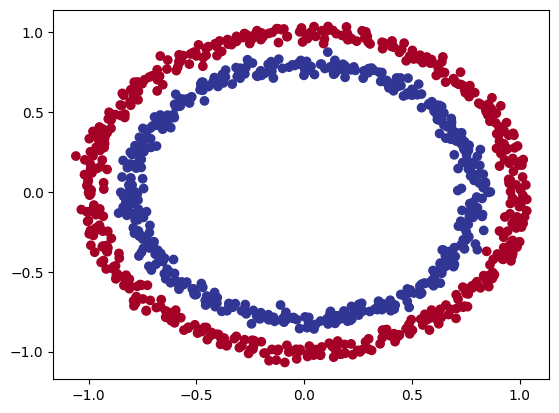

In [8]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [9]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# Check how many samples we have
len(X), len(y)

(1000, 1000)

In [11]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 0.9417 - accuracy: 0.5000
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.4850
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.4850
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4630
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4640


In [13]:
# Train our model for longer (more chances to look at the data)
model_1.fit(X, y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1) 
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less

In [15]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [16]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.3361 - accuracy: 0.4590
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7224 - accuracy: 0.4930
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.4940
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.4780
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4810
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.4630
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5140
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5160
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.5010
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4750
Epoch 11/

In [17]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


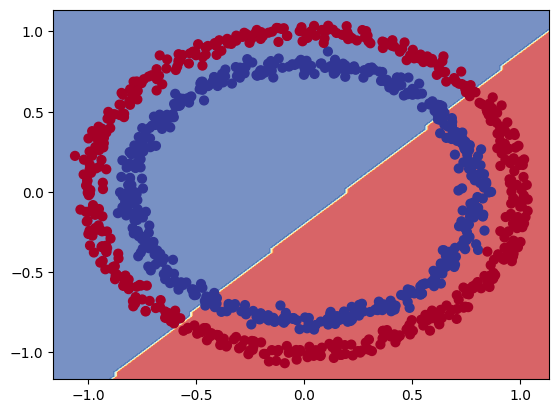

In [18]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: in user code:

    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 355.1589 - mae: 355.1589
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 220.4626 - mae: 220.4626
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 91.0383 - mae: 91.0383
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 65.6179 - mae: 65.6179
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 84.6351 - mae: 84.6351
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 57.1567 - mae: 57.1567
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 46.3625 - mae: 46.3625
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 45.3548 - mae: 45.3548
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 44.2899 - mae: 44.2899
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 43.3132 - mae: 43.3132
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 5ms/step


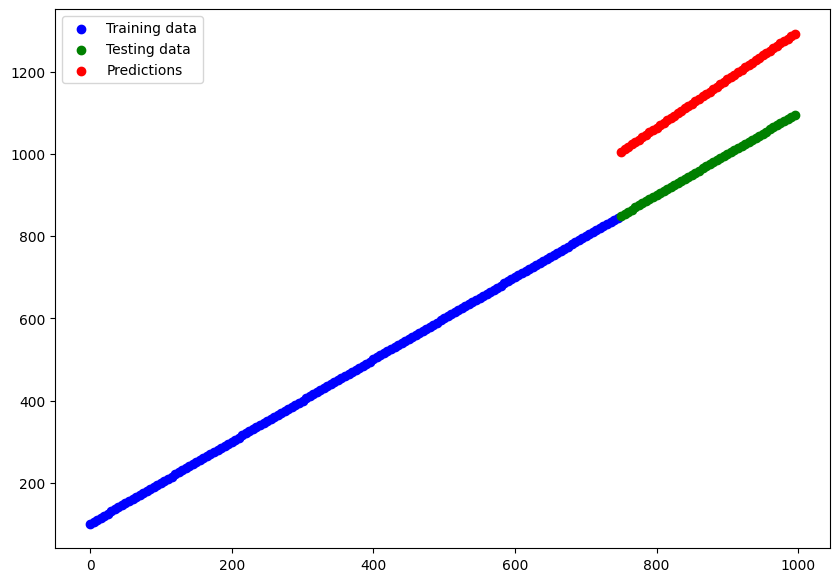

In [22]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

In [23]:
tf.random.set_seed(42)

model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history=model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.4508 - accuracy: 0.4740
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4198 - accuracy: 0.4710
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4086 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3696 - accuracy: 0.4690
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3475 - accuracy: 0.4680
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3414 - accuracy: 0.4670
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3353 - accuracy: 0.4680
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3204 - accuracy: 0.4660
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2380 - accuracy: 0.4690
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2133 - accuracy: 0.4730
Epoch 11/

In [24]:
tf.random.set_seed(42)

model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history=model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 3.9547 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 3.1767 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 2.7477 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 2.5993 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 2.3882 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 2.1552 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.8334 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 1.5204 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9661 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8900 - accuracy: 0.5000
Epoch 11/

In [25]:
model_5.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6671 - accuracy: 0.5840


[0.6671285033226013, 0.5839999914169312]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


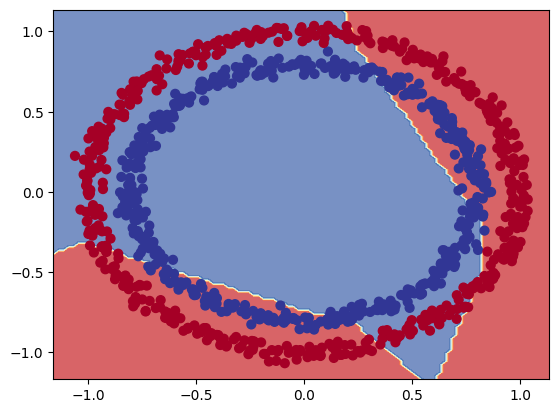

In [26]:
plot_decision_boundary(model_5,X,y)

In [27]:
tf.random.set_seed(42)

model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["accuracy"])
history=model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6968 - accuracy: 0.5100
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4660
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4760
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5020
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5040
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 11/

In [28]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931704878807068, 0.5]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


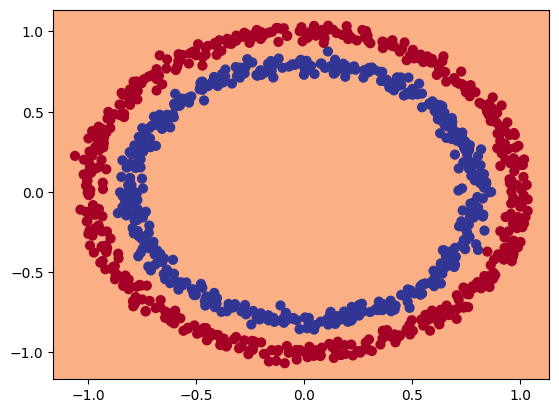

In [29]:
plot_decision_boundary(model_6,X,y)

In [30]:
import tensorflow as tf
A=tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

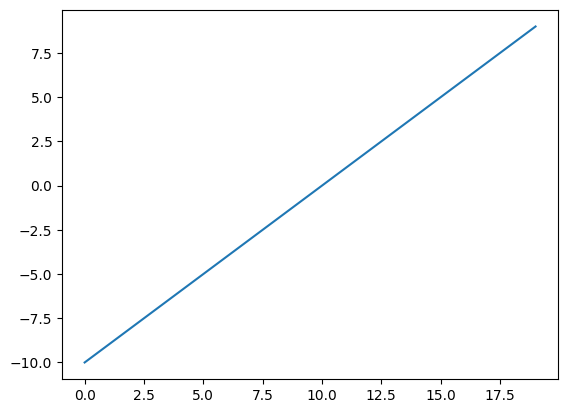

In [31]:
plt.plot(A)

In [32]:
def sigmoid(x):
    return 1/(1+tf.exp(-x))
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

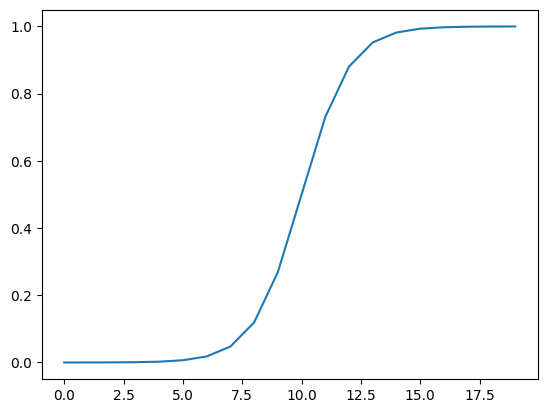

In [33]:
plt.plot(sigmoid(A))

In [34]:
def relu(x):
    return tf.maximum(0,x)
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

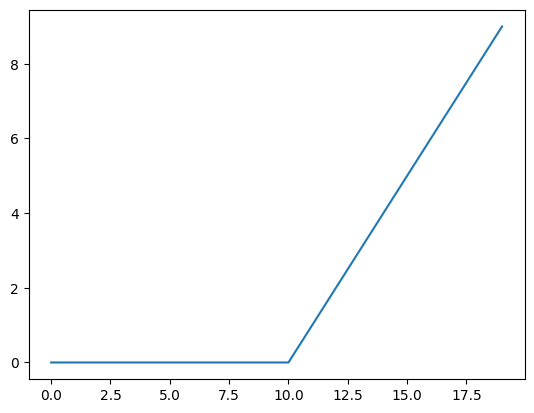

In [35]:
plt.plot(relu(A))

In [36]:
def linear(x):
    return x
linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

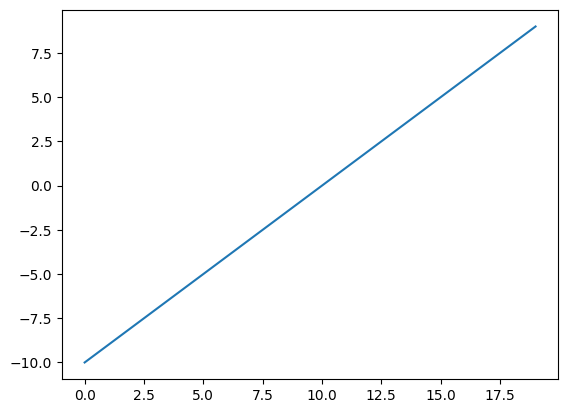

In [37]:
plt.plot(A)

# Linear layer doesnt modify anything as the input  data doesnt  change through out when passed through the network


### Evaluating and improving our  classification model 

In [38]:
len(X)

1000

In [39]:
X_train,y_train=X[0:800],y[0:800]
X_test,y_test=X[800:],y[800:]
l=[X_test,y_test,X_train,y_train]
for i in l:
    print(len(i))



200
200
800
800


In [40]:
tf.random.set_seed(42)
model_8= tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(1,activation="sigmoid"),
    ]
)
model_8.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss=tf.keras.losses.BinaryCrossentropy(),metrics=["accuracy"])
history=model_8.fit(X_test,y_test)
history=model_8.fit(X_train,y_train,epochs=25)


7/7 [==============================] - 1s 3ms/step - loss: 0.6924 - accuracy: 0.5050
Epoch 1/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5238
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5875
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.5838
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.6250
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6429 - accuracy: 0.6438
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.7000
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5858 - accuracy: 0.7412
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5562 - accuracy: 0.7550
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.8462
Epoch 10/25
25/25 [==============

In [41]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0981 - accuracy: 0.9900


[0.09812220931053162, 0.9900000095367432]

In [42]:
history.history

{'loss': [0.6902522444725037,
  0.6836493015289307,
  0.6762393712997437,
  0.6642693281173706,
  0.6429103016853333,
  0.6163192987442017,
  0.5857938528060913,
  0.5561960339546204,
  0.49362364411354065,
  0.43310683965682983,
  0.37630829215049744,
  0.3243730962276459,
  0.28615784645080566,
  0.24702142179012299,
  0.213314488530159,
  0.19270455837249756,
  0.1731073260307312,
  0.15258170664310455,
  0.1378503292798996,
  0.1301940232515335,
  0.11666809767484665,
  0.11248885840177536,
  0.10576674342155457,
  0.09915010631084442,
  0.09609570354223251],
 'accuracy': [0.5237500071525574,
  0.5874999761581421,
  0.5837500095367432,
  0.625,
  0.643750011920929,
  0.699999988079071,
  0.7412499785423279,
  0.7549999952316284,
  0.8462499976158142,
  0.90625,
  0.9300000071525574,
  0.9624999761581421,
  0.9662500023841858,
  0.9800000190734863,
  0.9850000143051147,
  0.9825000166893005,
  0.9837499856948853,
  0.9925000071525574,
  0.9925000071525574,
  0.9850000143051147,
  0.

In [43]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.690252,0.52375
1,0.683649,0.58750
2,0.676239,0.58375
3,0.664269,0.62500
4,0.642910,0.64375
5,0.616319,0.70000
6,0.585794,0.74125
7,0.556196,0.75500
8,0.493624,0.84625
9,0.433107,0.90625


Text(0.5, 1.0, 'Model_8 loss curvies')

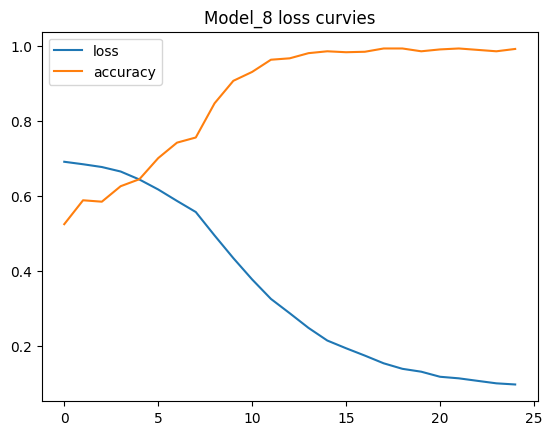

In [44]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curvies")

In [45]:
tf.random.set_seed(42)
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 *10**(epoch/20))
history_9=model_9.fit(X_train,y_train,epochs=100,callbacks=lr_scheduler)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6898 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5038 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5025 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5038 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5038 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5025 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5013 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<AxesSubplot:xlabel='epochs '>

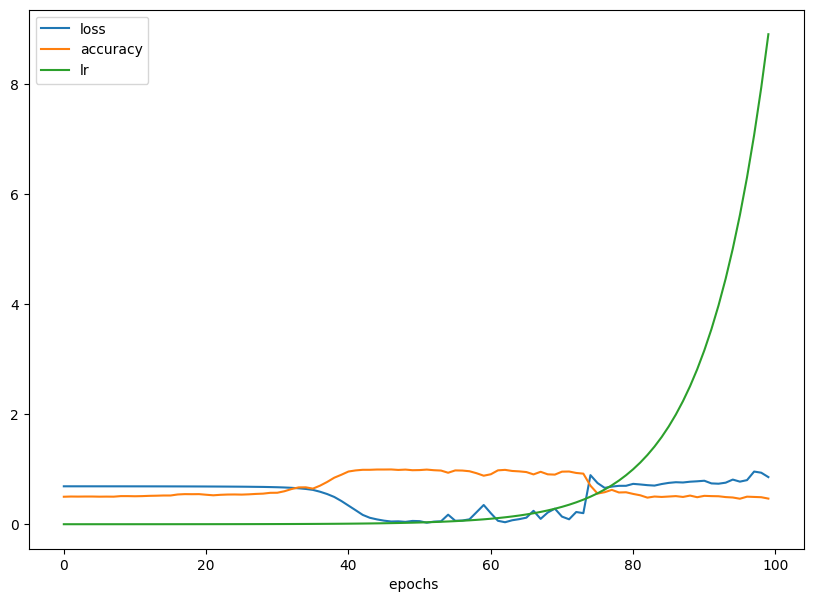

In [46]:
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs ")

Text(0.5, 1.0, 'Learning rate vs Loss')

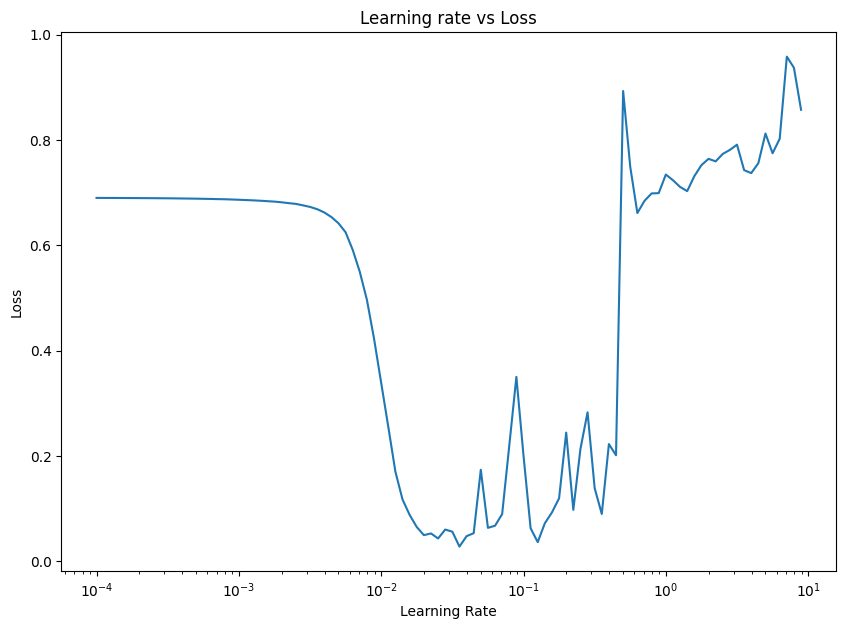

In [47]:
lrs= 1e-4 *(10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

# More methods to improve our efficiency in classification problems
* Accuracy
* Precision
* Recall
* F1Score
* Confusion Matrix
* Classification report(scikitlearn)


In [48]:
from sklearn.metrics import confusion_matrix
y_preds=model_8.predict(X_test)
# confusion_matrix(y_test,y_preds)

7/7 [==============================] - 0s 1ms/step


In [49]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [50]:
y_preds[:10]

array([[0.9401581 ],
       [0.9401581 ],
       [0.9051212 ],
       [0.9401581 ],
       [0.0532822 ],
       [0.03454645],
       [0.9401581 ],
       [0.00250046],
       [0.9401581 ],
       [0.01296831]], dtype=float32)

Oops looksl ike our predictions array has come out in predicton probability form the standard output from the activation functions


In [51]:
# Cnvert prediction to binary fo4rmat and view the first
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [52]:

confusion_matrix(y_test,tf.round(y_preds))

array([[99,  2],
       [ 0, 99]], dtype=int64)

# How about we prettify our confusion matrix

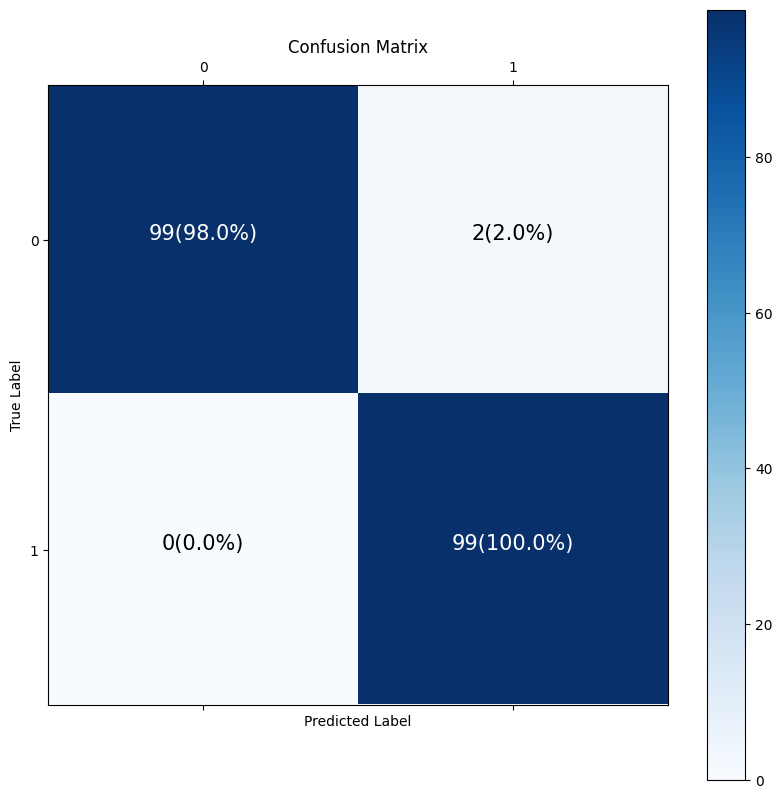

In [53]:
import itertools
figsize =(10,10)
cm=confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype("float")/cm.sum(axis=1)[:np.newaxis]
n_classes=cm.shape[0]
# Lets prettify it 
fig,ax = plt.subplots(figsize=figsize)
cax= ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)
classes=False
if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels
       )
threshold =(cm.max()+cm.min())/2
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i,j]>threshold else "black",
             size =15)

In [122]:
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(20, 20), text_size=15): 

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with


  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

# Working with larger example(Multiclass Classification)
When you have more than two classes as an option its known as multi class classification 
* this means if you have 3 classes its a multiclass classification
* this means if you have 100 classes its a multiclass classification



To practice multiclass classificcation we are going to build a neural network to classify images of different iems of clothing



In [55]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
# data already been sorted into training and test sets for us

(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

In [56]:
print(f"Training sample :\n{train_data[0]}\n")
print(f"Training label :\n{train_labels[0]}\n")


Training sample :
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [57]:
train_data[0].shape,train_labels[0].shape

((28, 28), ())

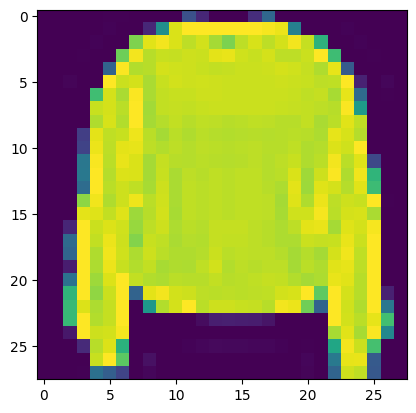

In [58]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [59]:
train_labels[7]

2

In [60]:
# Create a small list we can index onto our training labels they are human readable
# class_names=[]
class_names=["T—shirt/top","Trouser","Pullover","Dress","Coat"," Sandal" ,"Shirt" ,"Sneaker"," Bag","Ankle Boot" ]
len(class_names)

10

Text(0.5, 1.0, 'T—shirt/top')

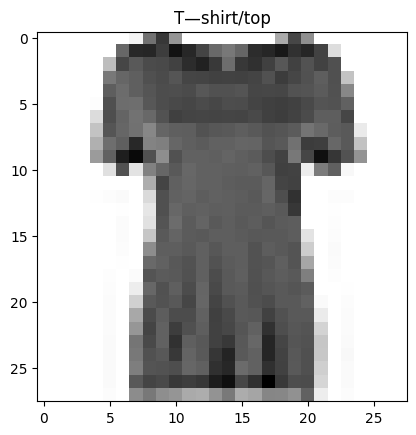

In [61]:
# plot an example image
index_of_choice=10
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

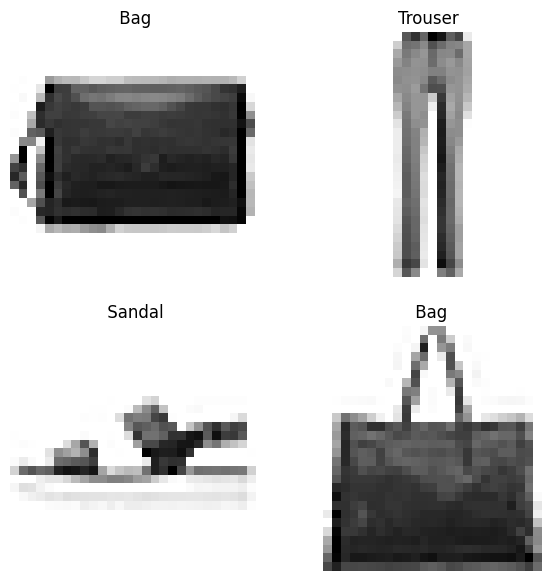

In [69]:
import random 
plt.figure(figsize=(7,7))
for i in range(4):
    ax=plt.subplot(2,2,1+i)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [70]:
# Building a multi classification model
tf.random.set_seed(42)
model_11=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
non_norm_history=model_11.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels)) 


Epoch 1/10


ValueError: in user code:

    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32,) and (32, 28, 10) are incompatible


# Shape error will be present so we need to flatten the data as the input shape of data is different of that as  the testing data and labels so we use a function called layers.Flatten and pass the input shape of the training data to make sure that the function works properly

In [71]:
# Building a multi classification model
tf.random.set_seed(42)
model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
non_norm_history=model_11.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels)) 


Epoch 1/10


ValueError: in user code:

    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\samim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras-2.11.0-py3.10.egg\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 1) and (32, 10) are incompatible


# You get an error again  
* this error is due to the fact that the loss function which we have  used is incorrect
* question: isnt it correct to use categorical cross entropy as loss function in multiclass classification problem ?????🤔🤔🤔🤔🤔
* answer : Yess it is but there  is a small catch to it you can only use categorical class entropy as loss function in multiclass classification problem if the data has been one hot encoded
* ***solution : if data is not one hot encoded we have use sparse categorical cross entropy as our loss function***

In [86]:
# Building a multi classification model
tf.random.set_seed(42)
model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
non_norm_history=model_11.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels)) 


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.6723 - accuracy: 0.1436 - val_loss: 2.1895 - val_accuracy: 0.1470
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0374 - accuracy: 0.1946 - val_loss: 1.7598 - val_accuracy: 0.2798
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6289 - accuracy: 0.2706 - val_loss: 1.5624 - val_accuracy: 0.2814
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5262 - accuracy: 0.3234 - val_loss: 1.4778 - val_accuracy: 0.3538
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4743 - accuracy: 0.3761 - val_loss: 1.4620 - val_accuracy: 0.3780
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4517 - accuracy: 0.3937 - val_loss: 1.4514 - val_accuracy: 0.3878
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4330 - accuracy: 0.4044 - val_loss: 1.4520 - val_accuracy:

# So we understood the error and its solution there is another solution for the same error which we get we can just one hot encode the data and then test it through the model using the tf.onehotencode function

In [74]:
tf.one_hot(train_labels,depth=10)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [84]:
# Building a multi classification model
tf.random.set_seed(42)
model_trial=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])
model_trial.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
non_norm_history=model_trial.fit(train_data,tf.one_hot(train_labels,depth=10),epochs=10,validation_data=(test_data,tf.one_hot(test_labels,depth=10)))


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3449 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [79]:
# our model doesnt perform that good so what we have to do is we have to make our model better as we go along
# Check the data in which format
train_data.min(),train_data.max()

(0, 255)

* but we know that the model prefers the data to be in normalised form so we have to convert the data into normalised formm

In [80]:
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [102]:
# Building a multi classification model
tf.random.set_seed(42)
model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
norm_history=model_11.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels)) 


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7190 - accuracy: 0.7491 - val_loss: 0.5174 - val_accuracy: 0.8219
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4603 - accuracy: 0.8386 - val_loss: 0.5242 - val_accuracy: 0.8199
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4280 - accuracy: 0.8481 - val_loss: 0.4688 - val_accuracy: 0.8295
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4108 - accuracy: 0.8553 - val_loss: 0.4576 - val_accuracy: 0.8356
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4024 - accuracy: 0.8577 - val_loss: 0.4573 - val_accuracy: 0.8391
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3929 - accuracy: 0.8599 - val_loss: 0.4475 - val_accuracy: 0.8365
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3838 - accuracy: 0.8638 - val_loss: 0.4469 - val_accuracy:

<AxesSubplot:title={'center':'Normalized data'}>

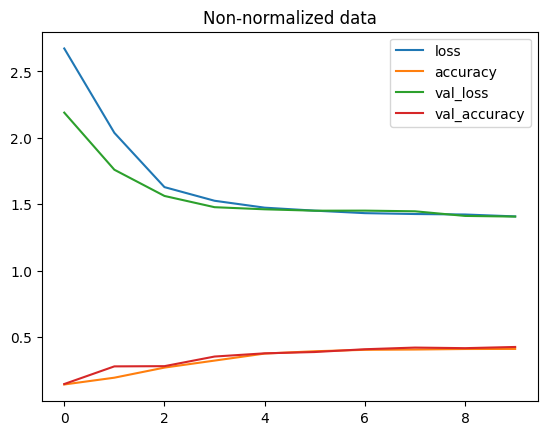

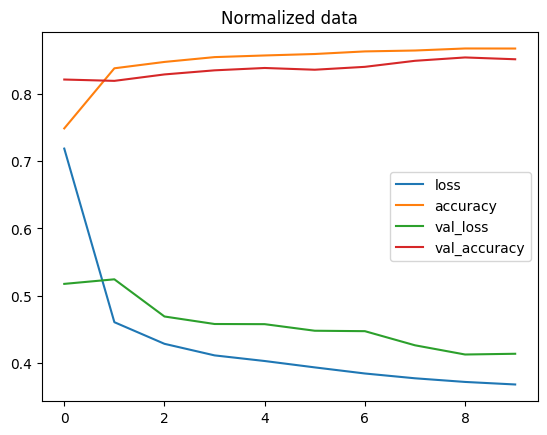

In [103]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
pd.DataFrame(norm_history.history).plot(title="Normalized data")


In [88]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [98]:
tf.random.set_seed(42)
model_14=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_14=model_14.fit(test_data_norm,test_labels,epochs=40,validation_data=(test_data_norm,test_labels))

Epoch 1/40
313/313 [==============================] - 2s 3ms/step - loss: 1.8553 - accuracy: 0.2697 - val_loss: 1.6209 - val_accuracy: 0.3289
Epoch 2/40
313/313 [==============================] - 1s 3ms/step - loss: 1.4504 - accuracy: 0.4274 - val_loss: 1.2869 - val_accuracy: 0.5104
Epoch 3/40
313/313 [==============================] - 1s 3ms/step - loss: 1.1977 - accuracy: 0.5278 - val_loss: 1.1151 - val_accuracy: 0.5343
Epoch 4/40
313/313 [==============================] - 1s 3ms/step - loss: 1.0733 - accuracy: 0.5526 - val_loss: 1.0311 - val_accuracy: 0.5613
Epoch 5/40
313/313 [==============================] - 1s 3ms/step - loss: 1.0026 - accuracy: 0.5878 - val_loss: 0.9732 - val_accuracy: 0.5854
Epoch 6/40
313/313 [==============================] - 1s 3ms/step - loss: 0.9594 - accuracy: 0.6279 - val_loss: 0.9337 - val_accuracy: 0.6323
Epoch 7/40
313/313 [==============================] - 1s 3ms/step - loss: 0.9265 - accuracy: 0.6531 - val_loss: 0.9066 - val_accuracy: 0.6576
Epoch 

In [104]:
#Make some predictions
y_probs = model_11.predict(test_data_norm)
y_probs

313/313 [==============================] - 1s 2ms/step


array([[7.8874291e-06, 1.2299005e-05, 8.5543411e-07, ..., 5.5593159e-02,
        3.9731848e-04, 7.4324602e-01],
       [1.2780601e-04, 1.9950576e-08, 9.7776824e-01, ..., 1.6991819e-26,
        3.2491905e-06, 9.2058853e-21],
       [5.5231700e-05, 9.9992430e-01, 2.2298952e-08, ..., 6.6430456e-15,
        3.1815894e-09, 8.7035032e-11],
       ...,
       [1.9173985e-02, 4.1734111e-08, 7.9678614e-03, ..., 1.7546537e-11,
        9.2770046e-01, 9.5672219e-15],
       [1.5654789e-05, 9.9582750e-01, 3.5233331e-06, ..., 5.1378770e-08,
        9.3006363e-08, 2.4280902e-07],
       [1.5411816e-04, 3.4087134e-05, 7.3651878e-05, ..., 3.9690812e-03,
        1.9054689e-03, 3.7506310e-04]], dtype=float32)

In [105]:
y_probs[0],tf.argmax(y_probs[0]),class_names[tf.argmax(y_probs[0])]

(array([7.8874291e-06, 1.2299005e-05, 8.5543411e-07, 2.1378237e-06,
        1.4856208e-06, 2.0070101e-01, 3.7882161e-05, 5.5593159e-02,
        3.9731848e-04, 7.4324602e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle Boot')

In [106]:
y_preds=y_probs.argmax(axis=1)
y_preds[:10]


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [107]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [108]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,y_pred=y_preds)

array([[859,   1,  14,  55,   9,   3,  41,   1,  17,   0],
       [  4, 954,   6,  28,   4,   1,   1,   0,   2,   0],
       [ 17,   4, 739,  16, 157,   3,  55,   0,   9,   0],
       [ 33,  11,  13, 887,  35,   2,  13,   0,   5,   1],
       [  0,   0,  85,  31, 825,   0,  53,   0,   6,   0],
       [  0,   0,   0,   0,   0, 942,   0,  32,   2,  24],
       [205,   2, 108,  49, 119,   3, 490,   0,  24,   0],
       [  0,   0,   0,   0,   0,  43,   0, 923,   0,  34],
       [  5,   1,   6,   8,   4,   6,   5,   3, 962,   0],
       [  0,   0,   0,   0,   0,  16,   1,  42,   1, 940]], dtype=int64)

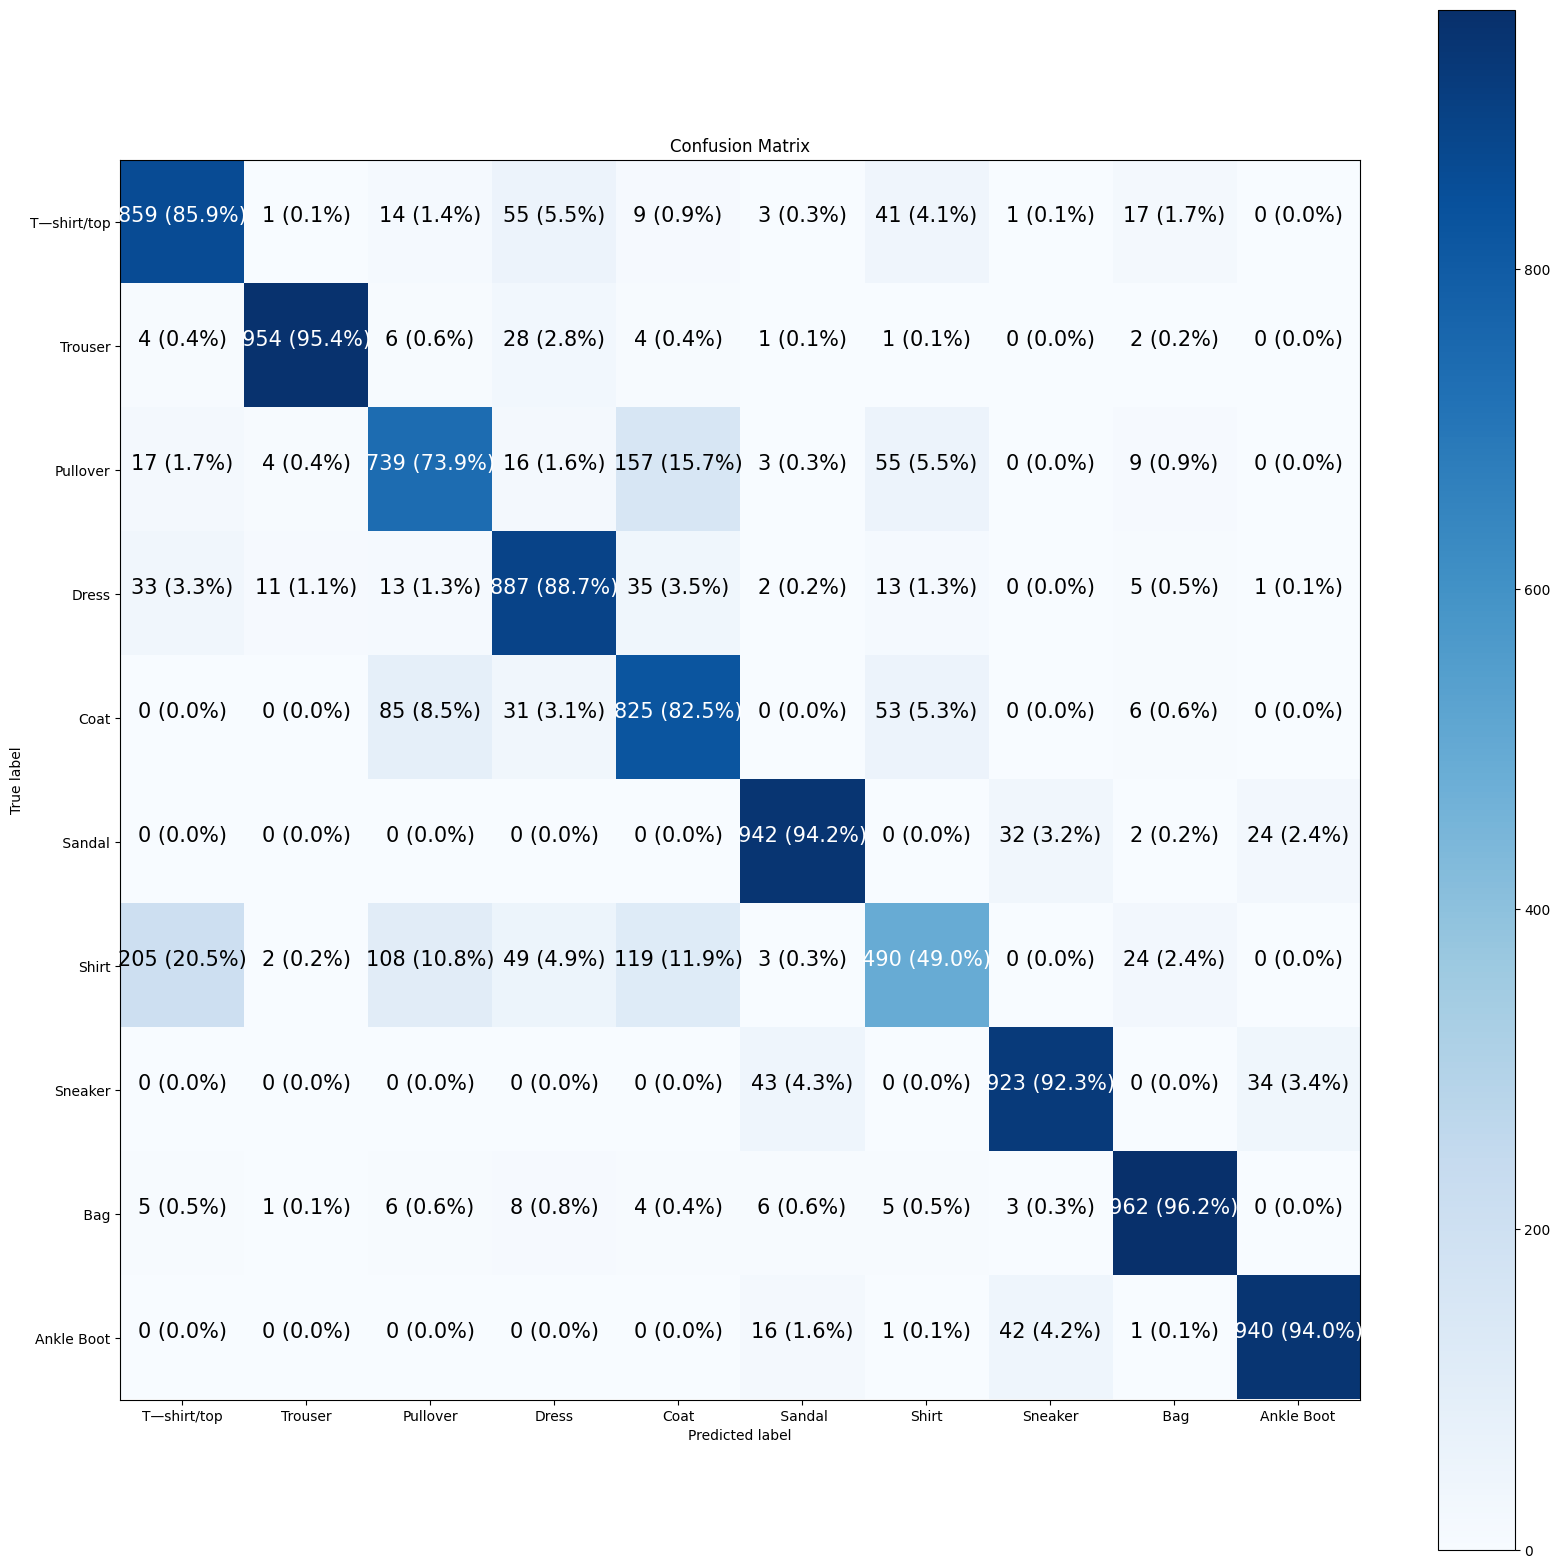

In [123]:
make_confusion_matrix(y_true=test_labels,y_pred=y_preds,classes=class_names)

In [137]:
import random
def plot_random_image(model,images,true_labels,classes):
    i = random.randint(0,len(images))
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1,28,28),verbose=0)
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    plt.imshow(target_image,cmap=plt.cm.binary)

    if pred_label == true_label:
        color ="green"
    else:
        color="red"
    plt.xlabel("Pred:{} {:2.0f}%(True:{})".format(pred_label,100*tf.reduce_max(pred_probs),true_label),color=color)

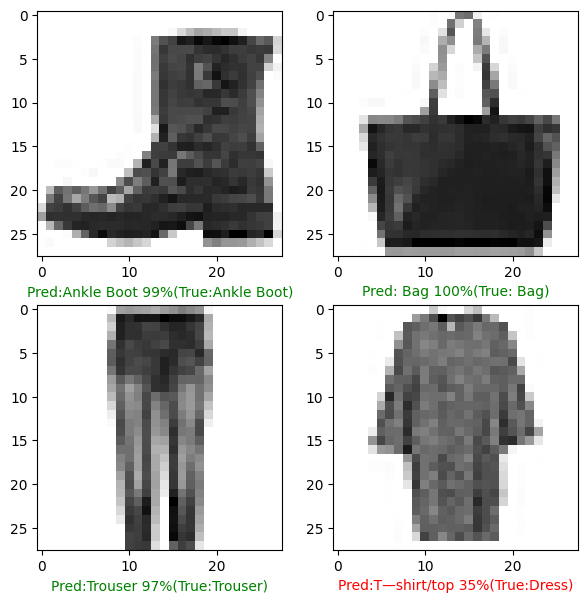

In [140]:
import random 
plt.figure(figsize=(7,7))
for i in range(4):
    ax=plt.subplot(2,2,1+i)
    plot_random_image(model=model_14,images=test_data_norm,true_labels=test_labels,classes=class_names)